In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# File to Load
housing_price_data_path = Path(r"C:\Users\gurpa\Documents\GitHub\project-1-group-3\MLS_Gurpal.csv")

#File was taken from https://www.kaggle.com/datasets/alankmwong/toronto-home-price-index

# Read Housing Data and store into Panda DataFrames
housing_price_data_df = pd.read_csv(housing_price_data_path)

#Show DataFrame
housing_price_data_df.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-01
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-01
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-01
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-01
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-01


In [2]:
#Filter out locations to Toronto specific locations only
housing_price_toronto = housing_price_data_df[(housing_price_data_df["Location"] == "City of Toronto") |
                                          (housing_price_data_df["Location"] == "Toronto C01") |
                                          (housing_price_data_df["Location"] == "Toronto C02") |
                                          (housing_price_data_df["Location"] == "Toronto C03") | 
                                          (housing_price_data_df["Location"] == "Toronto C04") |
                                          (housing_price_data_df["Location"] == "Toronto C05") | 
                                          (housing_price_data_df["Location"] == "Toronto C06") | 
                                          (housing_price_data_df["Location"] == "Toronto C07") |
                                          (housing_price_data_df["Location"] == "Toronto C08") |
                                          (housing_price_data_df["Location"] == "Toronto C09") |
                                          (housing_price_data_df["Location"] == "Toronto C10") |
                                          (housing_price_data_df["Location"] == "Toronto C11") |
                                          (housing_price_data_df["Location"] == "Toronto C12") |
                                          (housing_price_data_df["Location"] == "Toronto C13") |
                                          (housing_price_data_df["Location"] == "Toronto C14") |
                                          (housing_price_data_df["Location"] == "Toronto C15") |
                                          (housing_price_data_df["Location"] == "Toronto E01") |
                                          (housing_price_data_df["Location"] == "Toronto E02") |
                                          (housing_price_data_df["Location"] == "Toronto E03") |
                                          (housing_price_data_df["Location"] == "Toronto E04") |
                                          (housing_price_data_df["Location"] == "Toronto E05") |
                                          (housing_price_data_df["Location"] == "Toronto E06") |
                                          (housing_price_data_df["Location"] == "Toronto E07") |
                                          (housing_price_data_df["Location"] == "Toronto E08") |
                                          (housing_price_data_df["Location"] == "Toronto E09") |
                                          (housing_price_data_df["Location"] == "Toronto E10") |
                                          (housing_price_data_df["Location"] == "Toronto E11") |
                                          (housing_price_data_df["Location"] == "Toronto W01") |
                                          (housing_price_data_df["Location"] == "Toronto W02") |
                                          (housing_price_data_df["Location"] == "Toronto W03") |
                                          (housing_price_data_df["Location"] == "Toronto W04") |
                                          (housing_price_data_df["Location"] == "Toronto W05") |
                                          (housing_price_data_df["Location"] == "Toronto W06") |
                                          (housing_price_data_df["Location"] == "Toronto W07") |
                                          (housing_price_data_df["Location"] == "Toronto W08") |
                                          (housing_price_data_df["Location"] == "Toronto W09") |
                                          (housing_price_data_df["Location"] == "Toronto W10") 
                                         ]

#Create DataFrame
housing_price_toronto = pd.DataFrame(housing_price_toronto)

    

#Display Dataframe
housing_price_toronto

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
567,City of Toronto,183.6,602000.0,6.93,194.5,843300.0,8.84,199.7,663500.0,7.89,183.2,442800.0,8.72,165.4,341800.0,3.83,2015-07-01
568,City of Toronto,184.0,602000.0,6.93,195.0,843300.0,8.84,200.0,663500.0,7.89,183.0,442800.0,8.72,165.0,341800.0,3.83,2015-07-01
569,City of Toronto,184.1,603600.0,7.54,194.9,845000.0,9.62,199.1,661500.0,8.03,183.7,444000.0,8.89,166.5,344100.0,4.59,2015-08-01
570,City of Toronto,184.0,603600.0,7.54,195.0,845000.0,9.62,199.0,661500.0,8.03,184.0,444000.0,8.89,167.0,344100.0,4.59,2015-08-01
571,City of Toronto,185.3,607600.0,8.62,196.7,852800.0,10.88,199.5,662900.0,8.54,184.7,446400.0,8.84,167.4,345900.0,5.95,2015-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,Toronto W10,312.8,710400.0,13.33,296.9,890700.0,12.89,302.7,774600.0,12.70,363.2,653800.0,20.70,320.2,444700.0,13.06,2020-11-01
4742,Toronto W10,311.3,707000.0,13.45,299.2,897600.0,13.98,305.1,780700.0,13.25,357.6,643800.0,20.20,315.5,438200.0,12.28,2020-12-01
4743,Toronto W10,312.8,710400.0,12.36,302.1,906300.0,12.89,306.9,785300.0,10.99,359.4,647000.0,25.62,315.0,437500.0,9.83,2021-01-01
4744,Toronto W10,327.4,743500.0,12.62,322.5,967500.0,17.10,318.9,816000.0,12.96,378.5,681400.0,24.38,324.1,450200.0,7.18,2021-02-01


In [3]:
#Assign each Location to a District
# Used https://stackoverflow.com/questions/19226488/change-one-value-based-on-another-value-in-pandas as source 

#City of Toronto
housing_price_toronto.loc[(housing_price_toronto.Location == "City of Toronto"),['District']] = "Old Toronto"

#Toronto Central
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C01"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C02"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C03"),['District']] = "York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C04"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C06"),['District']] = "North York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C07"),['District']] = "North York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C08"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C09"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C10"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C11"),['District']] = "East York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C12"),['District']] = "North York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C13"),['District']] = "North York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C14"),['District']] = "North York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto C15"),['District']] = "North York"

#Toronto Eastern
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E01"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E02"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E03"),['District']] = "East York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E04"),['District']] = "Scarborough"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E05"),['District']] = "Scarborough"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E06"),['District']] = "Scarborough"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E07"),['District']] = "Scarborough"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E08"),['District']] = "Scarborough"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E09"),['District']] = "Scarborough"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E10"),['District']] = "Scarborough"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto E11"),['District']] = "Scarborough"

#Toronto Western
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W01"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W02"),['District']] = "Old Toronto"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W03"),['District']] = "York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W04"),['District']] = "North York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W05"),['District']] = "North York"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W06"),['District']] = "Etobicoke"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W07"),['District']] = "Etobicoke"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W08"),['District']] = "Etobicoke"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W09"),['District']] = "Etobicoke"
housing_price_toronto.loc[(housing_price_toronto.Location == "Toronto W10"),['District']] = "Etobicoke"

#Display DataFrame with new inputs under District
housing_price_toronto

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date,District
567,City of Toronto,183.6,602000.0,6.93,194.5,843300.0,8.84,199.7,663500.0,7.89,183.2,442800.0,8.72,165.4,341800.0,3.83,2015-07-01,Old Toronto
568,City of Toronto,184.0,602000.0,6.93,195.0,843300.0,8.84,200.0,663500.0,7.89,183.0,442800.0,8.72,165.0,341800.0,3.83,2015-07-01,Old Toronto
569,City of Toronto,184.1,603600.0,7.54,194.9,845000.0,9.62,199.1,661500.0,8.03,183.7,444000.0,8.89,166.5,344100.0,4.59,2015-08-01,Old Toronto
570,City of Toronto,184.0,603600.0,7.54,195.0,845000.0,9.62,199.0,661500.0,8.03,184.0,444000.0,8.89,167.0,344100.0,4.59,2015-08-01,Old Toronto
571,City of Toronto,185.3,607600.0,8.62,196.7,852800.0,10.88,199.5,662900.0,8.54,184.7,446400.0,8.84,167.4,345900.0,5.95,2015-09-01,Old Toronto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,Toronto W10,312.8,710400.0,13.33,296.9,890700.0,12.89,302.7,774600.0,12.70,363.2,653800.0,20.70,320.2,444700.0,13.06,2020-11-01,Etobicoke
4742,Toronto W10,311.3,707000.0,13.45,299.2,897600.0,13.98,305.1,780700.0,13.25,357.6,643800.0,20.20,315.5,438200.0,12.28,2020-12-01,Etobicoke
4743,Toronto W10,312.8,710400.0,12.36,302.1,906300.0,12.89,306.9,785300.0,10.99,359.4,647000.0,25.62,315.0,437500.0,9.83,2021-01-01,Etobicoke
4744,Toronto W10,327.4,743500.0,12.62,322.5,967500.0,17.10,318.9,816000.0,12.96,378.5,681400.0,24.38,324.1,450200.0,7.18,2021-02-01,Etobicoke


In [4]:
#Replacing entire date with just the year and create new column for the Year
#used https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column as source
housing_price_toronto['Year'] = pd.DatetimeIndex(housing_price_toronto['Date']).year


housing_price_toronto

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date,District,Year
567,City of Toronto,183.6,602000.0,6.93,194.5,843300.0,8.84,199.7,663500.0,7.89,183.2,442800.0,8.72,165.4,341800.0,3.83,2015-07-01,Old Toronto,2015
568,City of Toronto,184.0,602000.0,6.93,195.0,843300.0,8.84,200.0,663500.0,7.89,183.0,442800.0,8.72,165.0,341800.0,3.83,2015-07-01,Old Toronto,2015
569,City of Toronto,184.1,603600.0,7.54,194.9,845000.0,9.62,199.1,661500.0,8.03,183.7,444000.0,8.89,166.5,344100.0,4.59,2015-08-01,Old Toronto,2015
570,City of Toronto,184.0,603600.0,7.54,195.0,845000.0,9.62,199.0,661500.0,8.03,184.0,444000.0,8.89,167.0,344100.0,4.59,2015-08-01,Old Toronto,2015
571,City of Toronto,185.3,607600.0,8.62,196.7,852800.0,10.88,199.5,662900.0,8.54,184.7,446400.0,8.84,167.4,345900.0,5.95,2015-09-01,Old Toronto,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,Toronto W10,312.8,710400.0,13.33,296.9,890700.0,12.89,302.7,774600.0,12.70,363.2,653800.0,20.70,320.2,444700.0,13.06,2020-11-01,Etobicoke,2020
4742,Toronto W10,311.3,707000.0,13.45,299.2,897600.0,13.98,305.1,780700.0,13.25,357.6,643800.0,20.20,315.5,438200.0,12.28,2020-12-01,Etobicoke,2020
4743,Toronto W10,312.8,710400.0,12.36,302.1,906300.0,12.89,306.9,785300.0,10.99,359.4,647000.0,25.62,315.0,437500.0,9.83,2021-01-01,Etobicoke,2021
4744,Toronto W10,327.4,743500.0,12.62,322.5,967500.0,17.10,318.9,816000.0,12.96,378.5,681400.0,24.38,324.1,450200.0,7.18,2021-02-01,Etobicoke,2021


In [5]:
#Reorganize data to relevant columns only for the analysis
complete_data = housing_price_toronto[["District", 
                                        "Year", 
                                        "CompBenchmark",
                                        "CompYoYChange"]]


complete_data

,District,Year,CompBenchmark,CompYoYChange
567,Old Toronto,2015,602000.0,6.93
568,Old Toronto,2015,602000.0,6.93
569,Old Toronto,2015,603600.0,7.54
570,Old Toronto,2015,603600.0,7.54
571,Old Toronto,2015,607600.0,8.62
...,...,...,...,...
4741,Etobicoke,2020,710400.0,13.33
4742,Etobicoke,2020,707000.0,13.45
4743,Etobicoke,2021,710400.0,12.36
4744,Etobicoke,2021,743500.0,12.62


In [6]:
#Export DataFrame to CSV
complete_data.to_csv(r"C:\Users\gurpa\Documents\GitHub\project-1-group-3\cleaned_dataset_Gurpal.csv")

In [7]:
#Below is the analysis conducted to compute the values needed for visualization.
#In particular, we are taking the average price(CompBenchmark) of homes per District and in each Year from 2015 - 2021.
#We are also calculating the average YoY Change of the prices per district and in each Year from 2015 - 2021.

#Separate data by District
old_toronto = complete_data[(complete_data["District"] == "Old Toronto")]
york = complete_data[(complete_data["District"] == "York")]
east_york = complete_data[(complete_data["District"] == "East York")]
north_york = complete_data[(complete_data["District"] == "North York")]
etobicoke = complete_data[(complete_data["District"] == "Etobicoke")]
scarborough = complete_data[(complete_data["District"] == "Scarborough")]


#Group by Year and take the mean of the CompBenchmark for each District
avgprices_oldtoronto = old_toronto.groupby(['Year'])['CompBenchmark'].mean()
avgprices_york = york.groupby(['Year'])['CompBenchmark'].mean()
avgprices_eastyork = east_york.groupby(['Year'])['CompBenchmark'].mean()
avgprices_northyork = north_york.groupby(['Year'])['CompBenchmark'].mean()
avgprices_etobicoke = etobicoke.groupby(['Year'])['CompBenchmark'].mean()
avgprices_scarborough = scarborough.groupby(['Year'])['CompBenchmark'].mean()


#Group by Year and take the mean of the CompYoYChange for each District
avgyoy_oldtoronto = old_toronto.groupby(['Year'])['CompYoYChange'].mean()
avgyoy_york = york.groupby(['Year'])['CompYoYChange'].mean()
avgyoy_eastyork = east_york.groupby(['Year'])['CompYoYChange'].mean()
avgyoy_northyork = north_york.groupby(['Year'])['CompYoYChange'].mean()
avgyoy_etobicoke = etobicoke.groupby(['Year'])['CompYoYChange'].mean()
avgyoy_scarborough = scarborough.groupby(['Year'])['CompYoYChange'].mean()


#Combine the data into a DataFrame for Average Prices Per District
avgprices_per_district = pd.DataFrame({"Old Toronto": avgprices_oldtoronto,
                                       "York": avgprices_york,
                                       "East York": avgprices_eastyork,
                                       "North York": avgprices_northyork,
                                       "Etobicoke": avgprices_etobicoke,
                                       "Scarborough": avgprices_scarborough})


#Combine the data into a DataFrame for Average YoY Change Per District
avgyoy_per_district = pd.DataFrame({"Old Toronto": avgyoy_oldtoronto,
                                       "York": avgyoy_york,
                                       "East York": avgyoy_eastyork,
                                       "North York": avgyoy_northyork,
                                       "Etobicoke": avgyoy_etobicoke,
                                       "Scarborough": avgyoy_scarborough})


#Change value of DataFrame to integers
avgprices_per_district = avgprices_per_district.astype("int64")
avgyoy_per_district = avgyoy_per_district.astype("int64")

In [8]:
#Display DataFrame for Average Prices Per District
avgprices_per_district

,Old Toronto,York,East York,North York,Etobicoke,Scarborough
Year,,,,,,
2015,743061,799833,635108,710977,536356,487510
2016,807755,887100,698225,806581,596721,540426
2017,943843,1071154,806920,941309,686750,632966
2018,1013652,1122791,865162,943060,718270,642114
2019,1070919,1164737,903758,971340,762500,672520
2020,1140740,1263079,983329,1048196,846258,760239
2021,1177205,1383983,1033650,1094404,905620,826233


In [9]:
#Display DataFrame for Average YoY Per District
avgyoy_per_district

,Old Toronto,York,East York,North York,Etobicoke,Scarborough
Year,,,,,,
2015,6,10,11,9,6,11
2016,10,13,13,16,12,13
2017,17,18,16,20,18,19
2018,7,4,7,2,5,1
2019,6,4,4,3,6,4
2020,6,8,8,8,11,11
2021,4,14,9,6,11,13


In [10]:
#Export both DataFrames to CSV
avgprices_per_district.to_csv(r"C:/Users/gurpa/Documents/GitHub/project-1-group-3/avgpriceperdistrict_Gurpal.csv")

avgyoy_per_district.to_csv(r"C:\Users\gurpa\Documents\GitHub\project-1-group-3\avgyoyperdistrict_Gurpal.csv")

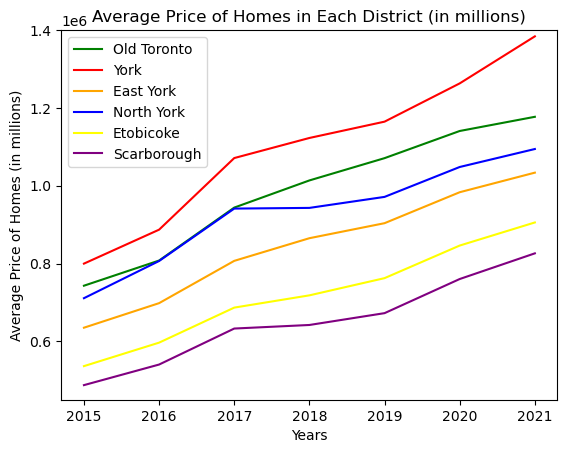

In [11]:
#Plotting Data for Average Prices Per District

#set new variables for each district from new dataframe
old_toronto_price = avgprices_per_district["Old Toronto"]
york_price = avgprices_per_district["York"]
east_york_price = avgprices_per_district["East York"]
north_york_price = avgprices_per_district["North York"]
etobicoke_price = avgprices_per_district["Etobicoke"]
scarborough_price = avgprices_per_district["Scarborough"]

#Create a Plot Graph
plt.plot(old_toronto_price, color="green", label="Old Toronto")
plt.plot(york_price, color="red", label="York")
plt.plot(east_york_price, color="orange", label="East York")
plt.plot(north_york_price, color="blue", label="North York")
plt.plot(etobicoke_price, color="yellow", label="Etobicoke")
plt.plot(scarborough_price, color="purple", label="Scarborough")
plt.legend(loc="best")
plt.title("Average Price of Homes in Each District (in millions)")
plt.xlabel("Years")
plt.ylabel("Average Price of Homes (in millions)")
plt.ylim(450000, 1400000)


# Save the figure
plt.savefig("Fig1_Gurpal.png")

#Show Plot
plt.show()

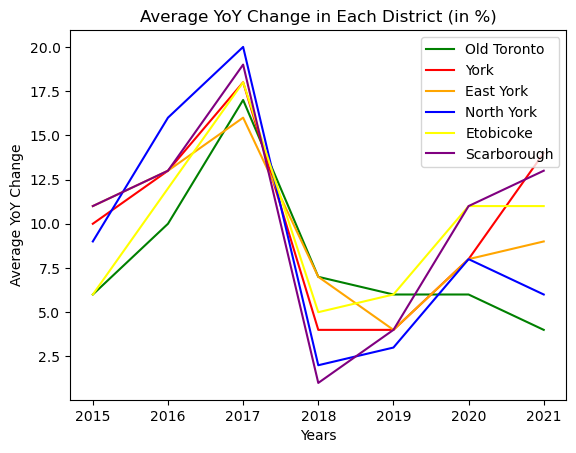

In [12]:
#Plotting Data for Average YoY Per District

#set new variables for each district from new dataframe
old_toronto_yoy = avgyoy_per_district["Old Toronto"]
york_yoy = avgyoy_per_district["York"]
east_york_yoy = avgyoy_per_district["East York"]
north_york_yoy = avgyoy_per_district["North York"]
etobicoke_yoy = avgyoy_per_district["Etobicoke"]
scarborough_yoy = avgyoy_per_district["Scarborough"]

#Create a Plot Graph
plt.plot(old_toronto_yoy, color="green", label="Old Toronto")
plt.plot(york_yoy, color="red", label="York")
plt.plot(east_york_yoy, color="orange", label="East York")
plt.plot(north_york_yoy, color="blue", label="North York")
plt.plot(etobicoke_yoy, color="yellow", label="Etobicoke")
plt.plot(scarborough_yoy, color="purple", label="Scarborough")
plt.legend(loc="best")
plt.title("Average YoY Change in Each District (in %)")
plt.xlabel("Years")
plt.ylabel("Average YoY Change")

# Save the figure
plt.savefig("Fig2_Gurpal.png")

#Show Plot
plt.show()